# Determining the Best Lag Length

The optimum lag length for time series modeling, found based on RMSE.

In [ ]:
import pandas as pd
import numpy as np
import kagglehub
import os

# API to access Kaggle resources
path = kagglehub.dataset_download('hardikgarg03/store-sales-time-series-forecasting')

# path to the CSV file
csv_file = os.path.join(path, 'submission.csv')

# read the CSV file
df = pd.read_csv(csv_file)
df.head()

100%|██████████| 271k/271k [00:00<00:00, 28.3MB/s]

Extracting files...


,id,sales
0,3000888,3.056196
1,3000889,1.445302
2,3000890,13.310976
3,3000891,2216.884255
4,3000892,1.445302


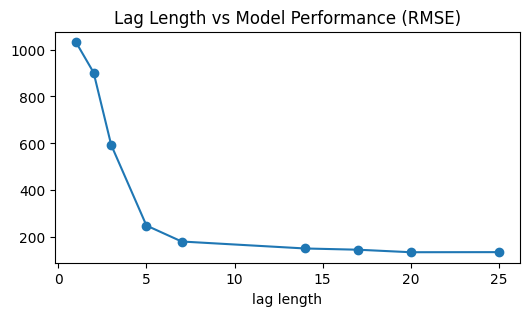

Best lag length: 20
RMSE: 136.479164


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# sales data
sales = df['sales']

def create_lagged_features(data, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# experiment with different lag values
lags = [1, 2, 3, 5, 7, 14, 17, 20, 25]
results = {}

for lag in lags:
    X, y = create_lagged_features(sales.values, lag)

    # split data into training and testing with 70/30 ratio
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, shuffle=False)

    # train XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror')
    model.fit(X_train, y_train)

    # make estimates and evaluate
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[lag] = rmse

# visualize results
plt.figure(figsize=(6, 3))
plt.plot(results.keys(), results.values(), marker='o')
plt.xlabel('lag length')
plt.title('Lag Length vs Model Performance (RMSE)')
plt.show()

# show results for different lags
best_lag = min(results, key=results.get)
print(f'Best lag length: {best_lag}\nRMSE: {results[best_lag]:.6f}')